In [6]:
#Only use if sandbox is not installed
import os,sys
sys.path.append('../../../')

## Initialize Sensor and Projector

In [8]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [16]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="dummy")

/home/danielsk78/GitProjects/open_AR_Sandbox/sandbox/sensor/kinectV1.py:7: UserWarning: Freenect module not found, KinectV1 will not work
  warn('Freenect module not found, KinectV1 will not work')


JSON configuration loaded for sensor.
DummySensor initialized.


In [19]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)


JSON configuration loaded for projector.


Launching server at http://localhost:40221
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


## Initialize marker detection

In [20]:
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor = sensor)

Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
using dummy aruco module
Aruco module loaded
Aruco detection ready


## Initialize main thread for live update

In [21]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)


In [22]:
main.run()





Thread started or resumed...


### Control the features of the main thread

In [23]:
main.widget_plot_module()

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show colormap', value=True)
                [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                [3] Column
                    [0] Markdown(str)
                    [1] WidgetBox
                        [0] Checkbox(name='Show relief shading', value=True)
                        [1] FloatSlider(end=360.0, name='Azimuth', value=315, value_throttled=315)
                        [2] FloatSlider(end=90.0, name='Altitude', value=45, value_throttled=45)
                        [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25, value_throttled=0.25)
            [1] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show contours', value=True)
                [2] IntInput(name='Choose a contour step', value=100, value_throttled=100)
                [3] Checkbox(name='Show minor contours', value=True)
                [4] IntInput(name='Choose a minor c..., value=50, value_throttled=50)
                [5] Checkbox(name='Show contours label', value=True)
                [6] IntInput(name='set a contour l..., value=15, value_throttled=15)
        [1] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Aruco Detection', value=True)
                [2] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] WidgetBox
                            [0] Checkbox(name='Show aruco location', value=True)
                            [1] Checkbox(name='Show aruco id', value=True)
                            [2] Checkbox(name='Show line connecting a...)
                            [3] ColorPicker(name='Color', value='#ff0000')
                        [1] WidgetBox
                            [0] Markdown(str)
                            [1] Row
                                [0] IntInput(name='id', value=1, value_throttled=1, width=70)
                                [1] IntInput(name='x coordinate', value=50, value_throttled=50, width=70)
                                [2] IntInput(name='y coordinate', value=50, value_throttled=50, width=70)
                            [2] Button(button_type='success', name='Add dummy aruco dict')
                            [3] Button(button_type='warning', name='Clear aruco dict')
            [1] Column
                [0] Markdown(str)
                [1] RadioButtonGroup(button_type='success', name='Thread controller', options=['Start', 'Stop'], value='Start')
                [2] Checkbox(name='Check changes in fame')
                [3] CrossSelector(definition_order=False, name='Module manager', options=['CmapModule', ...], value=['CmapModule', ...])
                [4] Button(button_type='warning', name='Clear axes from p...)

## Set the path of: pytorch-CycleGAN-and-pix2pix 

In [24]:
from sandbox import _package_dir
package_dir=os.path.abspath(_package_dir+"/../../pytorch-CycleGAN-and-pix2pix")

## Import the desired module

In [25]:
from sandbox.modules.pytorch import LandscapeGeneration
landscape = LandscapeGeneration(extent=sensor.extent, package_dir=package_dir)

LoadSaveTopoModule loaded succesfully


## Add the module to the main thread

In [26]:
main.add_module('landscape', landscape)

module landscape added to modules


### Be sure that the model you want to use is saved in the checkpoint folder

In [45]:
assert len(landscape.name_trained_models)>0
landscape.name_model = landscape.name_trained_models[0]

#Now you can select which model you want to select, by default it will use the model that ppears first in the list
print("Possible models: ", landscape.name_trained_models, "\n Model to use:", landscape.name_model)

Possible models:  ['AletschWin_10k', 'train_1k', 'AletschWin_3k_lr0.002', 'AlpsSum1_10k', 'AlpsSum1_1k', 'AlpsSum1_5k', 'BernWin_5k', 'Aletsch_1k', 'BernWin_10k', 'Aletsch_5k', 'Allgaeu_5k', 'BernSum_10k', 'BernSum_5k', 'AllgaeuSum_10k', 'AlpsSum_3k_lr0.002'] 
 Model to use: AletschWin_10k


### Use the widgets from the LoadSaveTopoModule to set the area for the landscape generation

Use the tab "Box widgets" to modify the extent of the box and capture a new frame using the snapshot button

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] TextInput(name='Choose a folder t..., value='/home/danielsk78/GitProje...)
        [3] Markdown(str)
        [4] Button(name='Load Files in folder')
        [5] Markdown(str)
        [6] WidgetBox
            [0] RadioBoxGroup(name='Available Topographies', options=['None'], value='None')
        [7] Markdown(str)
        [8] FileSelector(directory='/home/danielsk78')
        [9] Button(button_type='success', name='Load other')
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Markdown(str)
                [1] IntSlider(end=262, name='x box origin', value=40, value_throttled=40)
                [2] IntSlider(end=208, name='y box origin', value=40, value_throttled=40)
                [3] IntSlider(end=262, name='box width', value=200, value_throttled=200)
                [4] IntSlider(end=208, name='box height', value=150, value_throttled=150)
                [5] Markdown(str)
                [6] Button(button_type='success', name='Snapshot')
                [7] Markdown(str)
                [8] RadioBoxGroup(name='Show in sandbox', options=['None', 'Show topography'...], value='None')
            [1] Matplotlib(Figure, height=500)
    [2] Column
        [0] Markdown(str)
        [1] WidgetBox
            [0] Markdown(str)
            [1] IntSlider(end=50, name='Release area width', start=1, value=10, value_throttled=10)
            [2] IntSlider(end=50, name='Release area height', start=1, value=10, value_throttled=10)
            [3] RadioButtonGroup(button_type='success', name='Show or erase the areas', options=['Show', 'Erase'])
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] TextInput(name='Choose a filename t..., value='/home/danielsk78/GitProje...)
        [3] Markdown(str)
        [4] Button(name='Save')
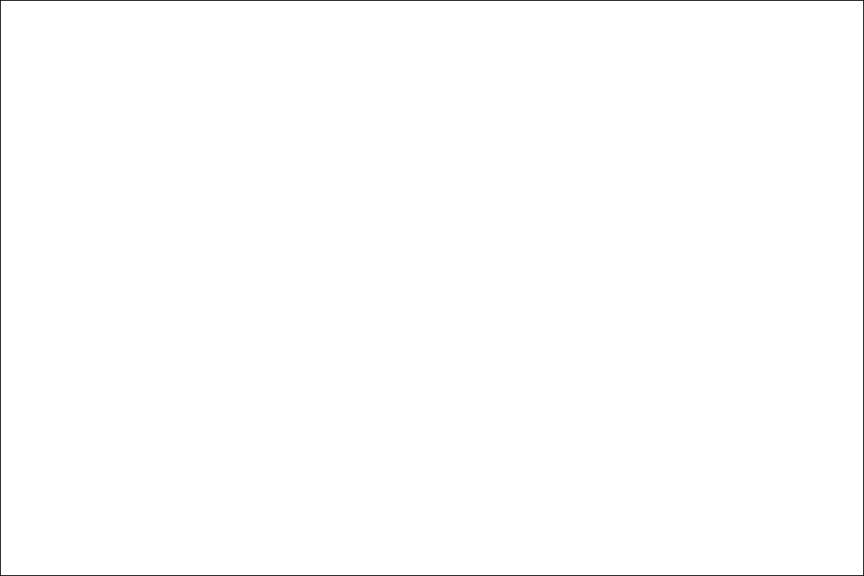

In [27]:

landscape.LoadArea.show_widgets()

It is also possible to this manually by:

In [30]:
save_topo = landscape.LoadArea.extractTopo()
assert landscape.LoadArea.absolute_topo is not None

### Now with the saved topography, we first need to modify and save the image to be used by pytorch-CycleGAN-and-pix2pix

In [32]:
DEM = landscape.get_image_modify()

saved succesfully in: /home/danielsk78/GitProjects/open_AR_Sandbox/sandbox/../notebooks/tutorials/09_LandscapeGeneration/saved_DEMs/test/


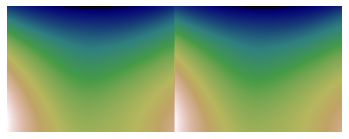

In [33]:
landscape.save_image(DEM, name = 'landscape_image.png')

### If the previous was succesfull and you can see the doubled image, you can continue by running the command line using the follow line: 

In [34]:
landscape.run_cmd()#package_dir=package_dir)

Landscape generated


'python /home/danielsk78/GitProjects/pytorch-CycleGAN-and-pix2pix/test.py --dataroot /home/danielsk78/GitProjects/open_AR_Sandbox/notebooks/tutorials/09_LandscapeGeneration/saved_DEMs --results_dir /home/danielsk78/GitProjects/open_AR_Sandbox/notebooks/tutorials/09_LandscapeGeneration/results --checkpoints_dir /home/danielsk78/GitProjects/open_AR_Sandbox/notebooks/tutorials/09_LandscapeGeneration/checkpoints --name AletschWin_10k --model pix2pix --gpu_ids -1 --direction AtoB'

This basically will construct the line you need to run in your terminal or cmd for pytorch-CycleGAN-and-pix2pix to run correctly in your system. If the line is not working, you can run this manually in your system. Just copy paste the previous

### When this is done, you can load and display the generated image by:

In [35]:
landscape.read_result(name = 'landscape_image.png')

Image loaded succesfully


Thread stopped.


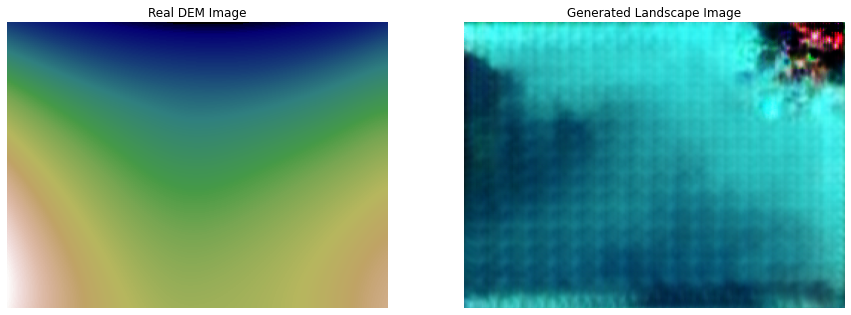

Thread started or resumed...


In [37]:
import matplotlib.pyplot as plt
main.stop()
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(landscape.DEM, origin="lower", cmap = "gist_earth")
ax[0].set_title("Real DEM Image")
ax[0].set_axis_off()

ax[1].imshow(landscape.img,  extent=landscape.LoadArea.to_box_extent)
ax[1].set_title("Generated Landscape Image")
ax[1].set_axis_off()
plt.show()
main.run()

### And if you want to visualize this image on the sandbox change this flag to True: 

In [39]:
landscape.show_landscape=True










## All the previous work also with widgets following the instructions and previous procedure

In [40]:
landscape.show_widgets()

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] RadioBoxGroup(name='Available Trained m..., options=['AletschWin_10k', ...], value='AletschWin_10k')
    [3] Markdown(str)
    [4] Button(button_type='success', clicks=1, name='Snapshot')
    [5] Markdown(str)
    [6] Button(button_type='success', name='Save frame')
    [7] Markdown(str)
    [8] Button(button_type='success', name='Save frame')
    [9] Markdown(str)
    [10] Button(button_type='success', name='Read landscape')
    [11] Checkbox(name='Show landscape', value=True)

In [ ]:












main.stop()